In [1]:
import numpy as np
import cf
import os
import netCDF4
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import dates
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
plt.style.use('/home/ctroupin/.config/matplotlib/stylelib/darkocean.mplstyle')

In [2]:
figdir = "/home/ctroupin/Pictures/SOCIB/"
datafile = ("http://thredds.socib.es/thredds/dodsC/drifter/surface_drifter/"
            "drifter_svp044-ogs_svp002/L1/2014/"
            "dep0001_drifter-svp044_ogs-svp002_L1_2014-05-25.nc")
datafile = ("http://thredds.socib.es/thredds/dodsC/drifter/surface_drifter/"
            "drifter_svp026-scb_svp021/L1/2015/"
            "dep0001_drifter-svp026_scb-svp021_L1_2015-07-14.nc")

In [3]:
cmap = plt.cm.RdYlBu_r
Nlon, Nlat = 5, 5

In [8]:
lon, lat, time, temperature = ReadDrifterData(datafile)

In [38]:
lat = np.ma.masked_where(((lat > 45.) | (lat < 37.5)), lat)
lon = np.ma.masked_where(lon > 7.5, lon)

lon.max()

6.9870000000000001

Prepare projection depending on the data

In [39]:
# coordinates = [-72., -10., 10., 35.]
coordinates = [np.floor(lon.min()), np.ceil(lon.max()), np.floor(lat.min()), np.ceil(lat.max())]
m = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2], urcrnrlon=coordinates[1],
            urcrnrlat=coordinates[3], lat_ts=0.5*(coordinates[2]+coordinates[3]), resolution='i')

In [40]:
figname = datafile.split('/')[-1][:-3]
figname = os.path.join(figdir, figname)

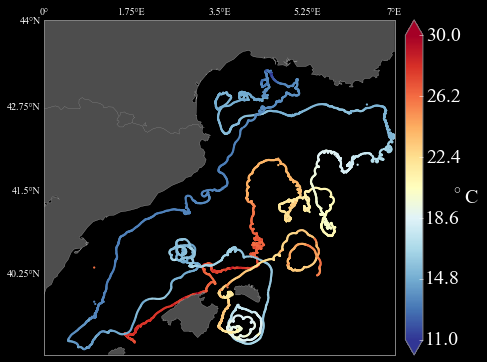

In [41]:
PlotTemperatureDrifter(lon, lat, temperature, m, figname)

In [6]:
def ReadDrifterData(datafile):
    f = cf.read(datafile)
    temperature = f.select('sea_water_temperature')
    lon = temperature[0].coord('lon').array
    lat = temperature[0].coord('lat').array
    time = temperature[0].coord('time').array
    temperatureQC = temperature[0].ancillary_variables[0].array
    temperature = temperature[0].array
    cf.close_files()

    temperature = np.ma.masked_where(temperatureQC != 1, temperature)
    return lon, lat, time, temperature

In [7]:
def PlotTemperatureDrifter(lon, lat, temperature, m, figname):
    
    lon, lat = m(lon, lat)
    fig = plt.figure(figsize=(15, 6))
    
    fmin, fmax = np.ceil(temperature.min()), np.floor(temperature.max())
    norm = colors.Normalize(vmin=fmin, vmax=fmax)
    bounds = np.linspace(fmin, fmax, 6)

    ax = fig.add_subplot(111)
    scat = m.scatter(lon, lat, s=5, c=temperature, edgecolor='None', cmap=cmap, norm=norm)
    m.drawcoastlines(linewidth=0.3, color="0.7", zorder=3)
    m.drawcountries(linewidth=0.2, color="0.7", zorder=3)

    m.fillcontinents(color="0.3", zorder=2)
    m.drawparallels(np.linspace(coordinates[2], coordinates[3], Nlat), linewidth=0.,
                    labels=[1, 0, 0, 0], fontname='Times New Roman', zorder=1)
    m.drawmeridians(np.linspace(coordinates[0], coordinates[1], Nlon), linewidth=0.,
                    labels=[0, 0, 1, 0], fontname='Times New Roman', zorder=1)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "5%", pad="3%")

    cbar = plt.colorbar(scat, cax=cax, extend='both', cmap=cmap, norm=norm, orientation='vertical')
    cbar.set_ticks(bounds)
    cbar.set_label('$^{\circ}$C', rotation=0)

    plt.savefig(figname, dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')
    plt.show()
    plt.close()

In [56]:
from matplotlib import get_configdir
get_configdir()

u'/home/ctroupin/.config/matplotlib'